In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
import joblib

#TODO 1: Load data
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

data.shape

(768, 9)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



Default Random Forest (n_estimators=100, max_depth=None):
Accuracy: 0.7792
ROC AUC: 0.7406
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



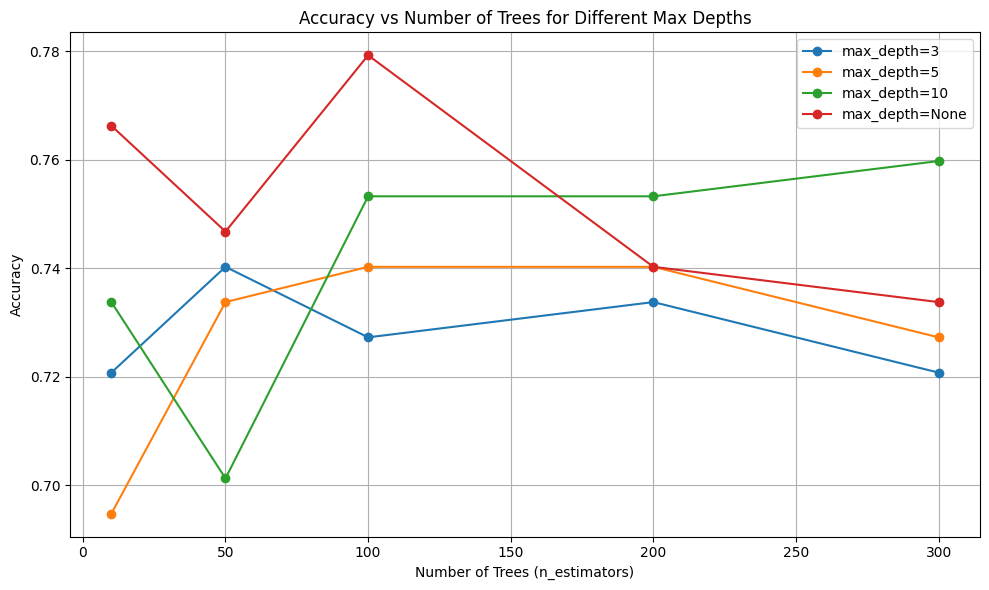

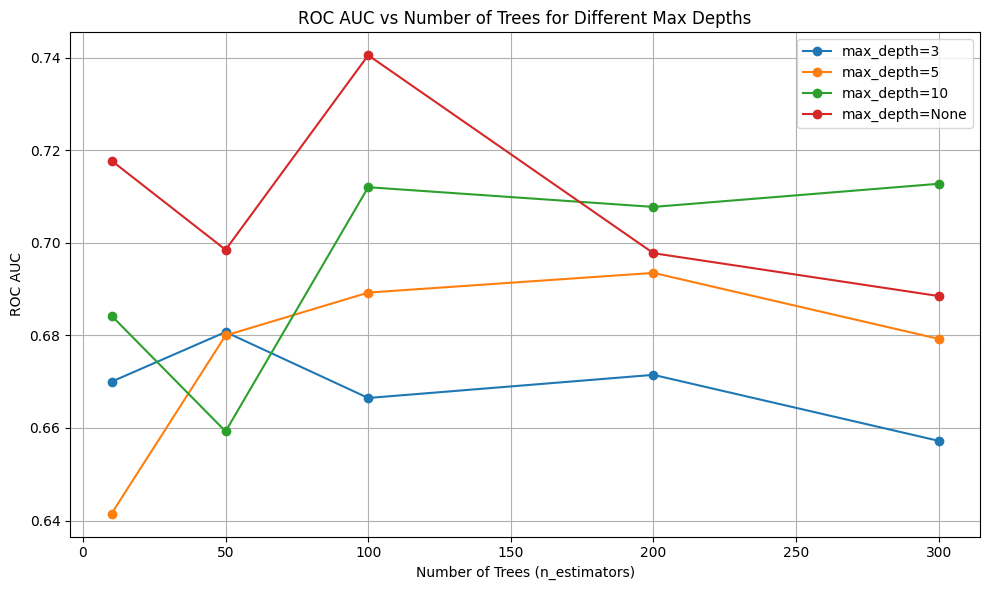


Best Model:
n_estimators: 100.0
max_depth: nan
Accuracy: 0.7792
ROC AUC: 0.7406

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



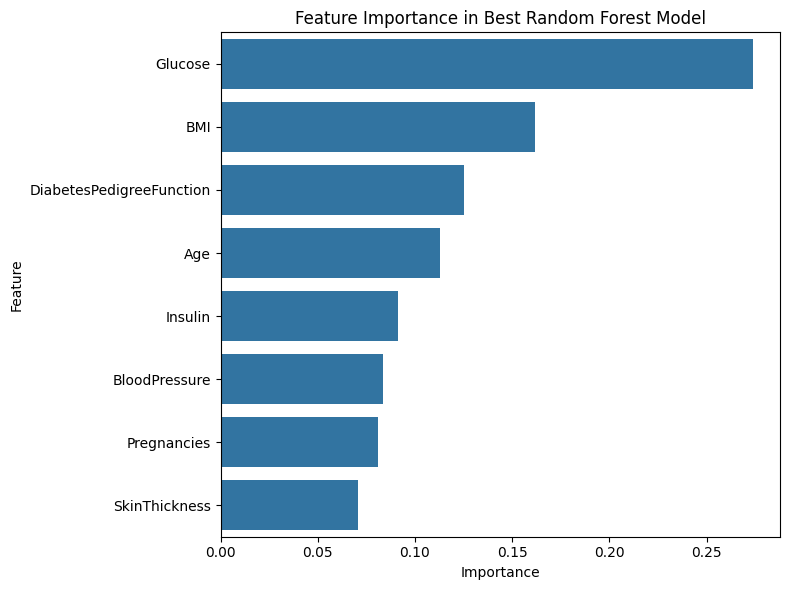


Model and scaler saved as 'diabetes_random_forest_model.pkl' and 'scaler.pkl'


In [8]:
#TODO: Handle missing/NaN values
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, data[col][data[col] != 0].median())

#TODO 2: Prepare features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

#TODO: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#TODO: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#TODO 3: Build Random Forest model
n_estimators_values = [10, 50, 100, 200, 300]
max_depth_values = [3, 5, 10, None]  # None means unlimited depth
results = []

# Train and evaluate models for different hyperparameter combinations
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Train Random Forest
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)
        rf.fit(X_train_scaled, y_train)
        
        # Predict and evaluate
        y_pred = rf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        results.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'accuracy': accuracy,
            'roc_auc': roc_auc
        })

results_df = pd.DataFrame(results)

#NOTE: (n_estimators=100, max_depth=None)
default_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
default_rf.fit(X_train_scaled, y_train)
y_pred_default = default_rf.predict(X_test_scaled)
print("\nDefault Random Forest (n_estimators=100, max_depth=None):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_default):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_default):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_default))

# Plot accuracy vs n_estimators for each max_depth
plt.figure(figsize=(10, 6))
for depth in max_depth_values:
    subset = results_df[results_df['max_depth'].eq(depth) | (results_df['max_depth'].isna() & (depth is None))]
    plt.plot(subset['n_estimators'], subset['accuracy'], marker='o', label=f'max_depth={depth if depth is not None else "None"}')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees for Different Max Depths')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('accuracy_vs_n_estimators.png')
plt.show()

# Plot ROC AUC vs n_estimators for each max_depth
plt.figure(figsize=(10, 6))
for depth in max_depth_values:
    subset = results_df[results_df['max_depth'].eq(depth) | (results_df['max_depth'].isna() & (depth is None))]
    plt.plot(subset['n_estimators'], subset['roc_auc'], marker='o', label=f'max_depth={depth if depth is not None else "None"}')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs Number of Trees for Different Max Depths')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('roc_auc_vs_n_estimators.png')
plt.show()

#TODO 4: Find best model
best_result = results_df.loc[results_df['roc_auc'].idxmax()]
print("\nBest Model:")
print(f"n_estimators: {best_result['n_estimators']}")
print(f"max_depth: {best_result['max_depth']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"ROC AUC: {best_result['roc_auc']:.4f}")

# Train and evaluate best model
# Explicitly handle max_depth to ensure it's an int or None
max_depth_best = None if pd.isna(best_result['max_depth']) else int(best_result['max_depth'])
best_rf = RandomForestClassifier(
    n_estimators=int(best_result['n_estimators']),
    max_depth=max_depth_best,
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train_scaled, y_train)
y_pred_best = best_rf.predict(X_test_scaled)
print("\nBest Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Best Random Forest Model')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Step 3: Save the model
joblib.dump(best_rf, 'diabetes_random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("\nModel and scaler saved as 'diabetes_random_forest_model.pkl' and 'scaler.pkl'")